<a href="https://colab.research.google.com/github/valenciajaime/MN2022_colabs/blob/main/Nuevos/MN2022_1_Fourier_r0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portada Fourier

**Nombres:** 
Esteban Velilla H, Jaime A. Valencia V


**Email:**
esteban.velilla@udea.edu.co, evelilla@udea.edu.co

jalejandro.valencia@udea.edu.co


**Curso:**
Metodos numericos 2022-1 WV

**Fecha:**
Miercoles 2022-agosto-03

**Fecha Edicion Final:**


# Descripción

**Objetivos:**

Presentacion de calculo de coeficientes de la serie de Fourier trigonometrica usandointegracion numerica.

Archivos el grupo WV csv.



**Desarrollo:**



1.   Lectura de archivos
2.   Grafico señal
3.   Calculo coef Fourier
4.   Reproduccion señal

   






# Importacion Modulos

In [2]:
import pylab as plt
import matplotlib
import numpy as np
import scipy as SC
import sympy as SP

print("Version numpy: ",np.__version__)
print("Version Matplotlib: ",matplotlib.__version__)
print("Version scipy: ", SC.__version__)
print("Version sympy: ",  SP.__version__)

Version numpy:  1.21.6
Version Matplotlib:  3.2.2
Version scipy:  1.7.3
Version sympy:  1.7.1


# Lectura de archivos (open)

In [3]:
#Funcion de lectura
def Leer_VRdat01(fnombre):
    """fnombre: str nombre de archivo
       Lectura de datos
       Se asumen datos en 2 columnas separados por ;
       tiempo: Columna 1
       Valor: Columna 2 pero se debe borrar []
       los decimales son ","
       Retorna 2 array
    """
    Datos = open(fnombre,"r")
    D_t = []
    D_v = []

    for q in Datos:
        a= q.split(';')
        D_t.append(float(a[0]))
        D_v.append(float(a[1][1:-2]))
    Datos.close()
    D_t = np.array(D_t)
    D_v = np.array(D_v)
    return D_t, D_v

    


## Lectura y grafico

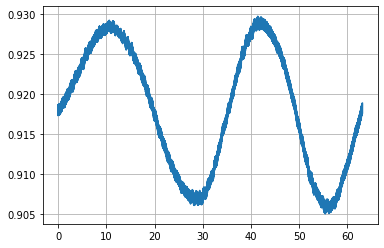

In [5]:
#grafico de datos
a_in1 = "Paula1_WV_01.csv"

DD = Leer_VRdat01(a_in1)
Tiempo = DD[0]
V_t = DD[1]

plt.plot(Tiempo, V_t)
plt.grid("on")
plt.show()

# Serie Fourier Trigonometrica

##Calculo coeficiente Fourier

[Serie Fourier- wikip](https://es.wikipedia.org/wiki/Serie_de_Fourier)

[mathworld_FourierSeries](https://mathworld.wolfram.com/FourierSeries.html)

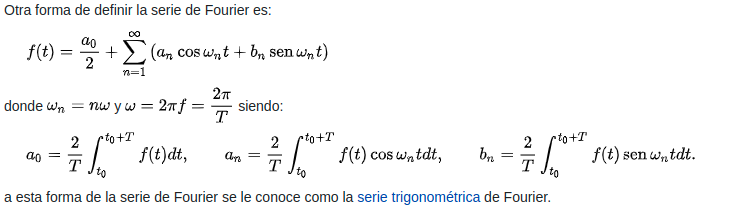

In [29]:
#Calculo de coeficientes de Fourier (serie Trigonometrica)

Periodo = Tiempo[-1]-Tiempo[0] #asumo que tengo un periodo de datos
Wo = 2*np.pi/Periodo #frecuencia fundamental
Freq = 1/Periodo
print("Perido: ",round(Periodo,2), " segs")
print("Frecuencia: ", round(Freq,2)," Hz")
print("Frecuencia Angular(Wo): ",round(Wo,2)," rads")


## Funciones de la serie de Fourier Trigonometricacalculo an y bn
F_cosn = lambda t,n:np.cos(n*Wo*t)
F_sinn = lambda t,n:np.sin(n*Wo*t)

## calculo coeficiente a0
a0 = np.trapz(V_t,Tiempo)*(2/Periodo) #
print("a0: ",a0)

####calculo a1
y1 = V_t*F_cosn(Tiempo,1)
a1 = np.trapz(y1,Tiempo)*(2/Periodo)
print("a1: ",a1)

####calculo b1#################
y2 = V_t*F_sinn(Tiempo,1)
b1 = np.trapz(y2,Tiempo)*(2/Periodo)
print("b1: ",b1)

####calculo a2
y1 = V_t*F_cosn(Tiempo,2)
a2 = np.trapz(y1,Tiempo)*(2/Periodo)
print("a2: ",a2)

####calculo b2#######################
y2 = V_t*F_sinn(Tiempo,2)
b2 = np.trapz(y2,Tiempo)*(2/Periodo)
print("b2: ",b2)

####calculo a3
y1 = V_t*F_cosn(Tiempo,3)
a3 = np.trapz(y1,Tiempo)*(2/Periodo)
print("a3: ",a3)

####calculo b3#######################
y2 = V_t*F_sinn(Tiempo,3)
b3 = np.trapz(y2,Tiempo)*(2/Periodo)
print("b3: ",b3)

Perido:  63.09  segs
Frecuencia:  0.02  Hz
Frecuencia Angular(Wo):  0.1  rads
a0:  1.8362337739017718
a1:  0.0010910396806290668
b1:  0.0014199999929590014
a2:  -0.005152321244513526
b2:  0.009111498885357047
a3:  0.0024414431351036745
b3:  0.00012907367062591746


##Reproduccion señal

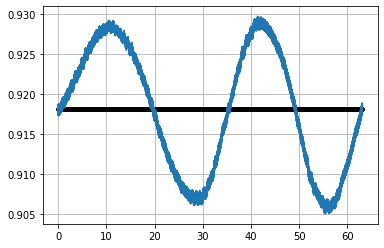

In [30]:
##Calculo de la serie con los coeficientes conocidos


F_serie = lambda t: 0*t+(a0/2)\
                    #+a1*F_cosn(t,1)+b1*F_sinn(t,1)\
                    #+a2*F_cosn(t,2)+b2*F_sinn(t,2)\
                    #+a3*F_cosn(t,3)+b3*F_sinn(t,3)

y_serie = F_serie(Tiempo)

plt.plot(Tiempo,y_serie,"k.-",Tiempo,V_t)
plt.grid("on")
plt.show()


##Comparacion con FFT

Valor DC:  0.9181153917730946 
 1.8362307835461893
Componente 1: 0.0008944782138214226 
 (0.0010877935150290707-0.001420236025689163j)
Componente 2: 0.0052319790722811415 
 (-0.005144556185164208-0.009111968048058555j)
Componente 3: 0.0012236779056781072 
 (0.0024445077192602202-0.00011803591765319138j)


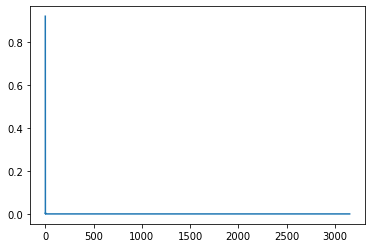

In [35]:
##Comparacion de magnitudes de coeficientes de Fourier
## de la serie Trigonometrica y la serie Compleja(resultado fft)

d_f = np.fft.fft(V_t)

d_fn = d_f/len(d_f)
print("Valor DC: ",abs(d_fn[0]),"\n",2*d_fn[0].real)
print("Componente 1:",abs(d_fn[1]),"\n",2*d_fn[1])
print("Componente 2:",abs(d_fn[2]),"\n", 2*d_fn[2])
print("Componente 3:",abs(d_fn[3]),"\n", 2*d_fn[3])
plt.plot(abs(d_fn[0:len(d_f)//2]))
plt.show()

# Resultados y conclusiones

**Conclusiones:**



**Resultados:**

**Referencias:**

[Numerical Computing with MATLAB
Copyright 2004, Cleve Moler. Fourier Analysis](https://la.mathworks.com/content/dam/mathworks/mathworks-dot-com/moler/fourier.pdf)

[Burde & Faires - ver Capitulo 8](https://udeaeduco.sharepoint.com/:b:/s/MtodosNumricos_2022-1/EQd1_32TgMhCh8MBU0FqxpIBSIjxSMEJKAcVIVyvYZHSng?e=nrWw8z)

[Chapra & Canale - ver Capitulo 19](https://udeaeduco.sharepoint.com/:b:/s/MtodosNumricos_2022-1/EZgs5MpMDKtLpAZlwGEmn9oB3FvpAGncvlnWPcZ9wRNhIg?e=fPcsyf)

[Kiusallas- NM with python ](https://udeaeduco.sharepoint.com/:b:/s/MtodosNumricos_2022-1/ESazTK0AHE5Pta-KrZ69VbUBds8rV7zE3pGtjjHiAO7-ig?e=07PVfI)